&nbsp;#PSD&nbsp;is&nbsp;defined&nbsp;as&nbsp;the&nbsp;discrete-time&nbsp;Fourier&nbsp;transformation&nbsp;(DTFT)&nbsp;of&nbsp;the&nbsp;auto-correlation&nbsp;function&nbsp;(ACF)&nbsp;Periodogram&nbsp;Method\begin{equation}\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})&nbsp;=&nbsp;\mathcal{F}_*&nbsp;\{&nbsp;\varphi_{xx}[\kappa]&nbsp;\}\end{equation}

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
Bias of the periodogram: 	 0.0236
Variance of the periodogram: 	 0.7911


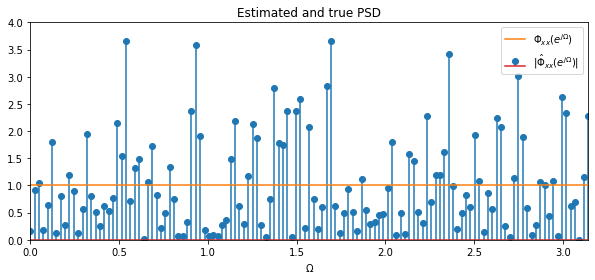

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 128  # number of samples

# generate random signal
np.random.seed(5)
x = np.random.normal(size=N)

# compute magnitude of the periodogram
x = np.concatenate((x, np.zeros_like(x)))
X = np.fft.rfft(x)
Om = np.linspace(0, np.pi, len(X))
Pxx = 1/N * abs(X)**2

# plot results
plt.figure(figsize=(10, 4))
plt.stem(Om, Pxx, 'C0',
         label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated and true PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 4])
plt.legend()

# compute bias/variance of the periodogram
print('Bias of the periodogram: \t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Variance of the periodogram: \t {0:1.4f}'.format(np.var(Pxx)))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
Bias of the Welch estimate: 		 -0.0114
Variance of the Welch estimate: 	 0.0255


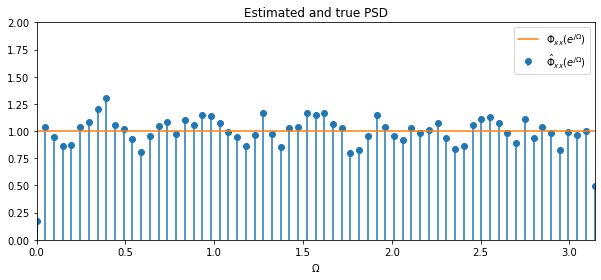

In [2]:
#  Welch Method

import scipy.signal as sig

N = 128  # length of segment
M = 64  # stepsize
L = 100  # total number of segments

# generate random signal
np.random.seed(5)
x = np.random.normal(size=L*M)

# estimate PSD by Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  # due to normalization in scipy.signal
Om = 2*np.pi*nf

# plot results
plt.figure(figsize=(10, 4))
plt.stem(Om, Pxx, 'C0',
         label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ', use_line_collection=True)
plt.plot(Om, np.ones_like(Pxx), 'C1', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated and true PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# compute bias/variance of the estimator
print('Bias of the Welch estimate: \t\t {0:1.4f}'.format(np.mean(Pxx-1)))
print('Variance of the Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))

Parametric Spectral Estimation

Bias of the Welch estimate: 		 2.8932
Variance of the Welch estimate: 	 62.0748
Bias of the parametric estimate: 	 -0.0291
Variance of the parametric estimate: 	 15.3476


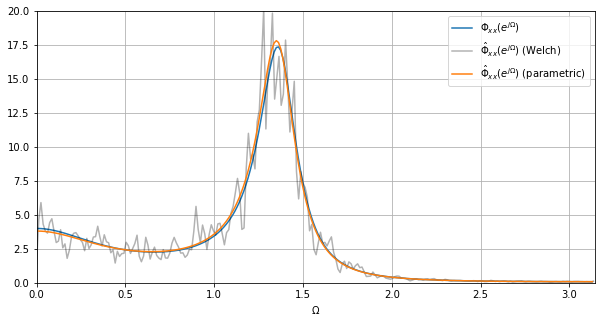

In [4]:
import statsmodels.api as sm

K = 4096  # length of random signal
N = 3  # order of AR model
a = np.array((1, -1, .5))  # coefficients of AR model

# generate random signal n[k]
np.random.seed(2)
n = np.random.normal(size=K)

# AR model for random signal x[k]
x = np.zeros(K)
for k in np.arange(3, K):
    x[k] = a[0]*x[k-1] + a[1]*x[k-2] + a[2]*x[k-3] + n[k]

# estimate AR parameters by Yule-Walker method
rho, sigma = sm.regression.yule_walker(x, order=N, method='mle')

# compute true and estimated transfer function
Om, H = sig.freqz(1, np.insert(-a, 0, 1), worN=256)
Om, He = sig.freqz(1, np.insert(-rho, 0, 1), worN=256)
# compute PSD by Welch method
Om2, Pxx = sig.welch(x, nperseg=511, return_onesided=True)

# plot PSDs
plt.figure(figsize=(10, 5))
plt.plot(Om, np.abs(H)**2, label=r'$\Phi_{xx}(e^{j\Omega})$')
plt.plot(Om2*2*np.pi, .5*Pxx, 'k-', alpha=.3,
         label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (Welch)')
plt.plot(Om, np.abs(He)**2,
         label=r'$\hat{\Phi}_{xx}(e^{j\Omega})$ (parametric)')

plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 20])
plt.legend()
plt.grid()

# compute bias/variance of the estimators
print('Bias of the Welch estimate: \t\t {0:1.4f}'.format(
    np.mean(Pxx-np.abs(H)**2)))
print('Variance of the Welch estimate: \t {0:1.4f}'.format(np.var(Pxx)))
print('Bias of the parametric estimate: \t {0:1.4f}'.format(
    np.mean(np.abs(H)**2-np.abs(He)**2)))
print('Variance of the parametric estimate: \t {0:1.4f}'.format(
    np.var(np.abs(He)**2)))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2db1e377-c568-4b8a-aa7c-fac7f5fb3638' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>